In [1]:
!pip install --index-url https://test.pypi.org/simple/ mediapipe==0.8.4.2.1

Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 37.3MB 123kB/s 


In [6]:
from google.colab import files
uploaded=files.upload()

Saving manni.jpg to manni.jpg
Saving maanii.jpg to maanii.jpg


manni.jpg


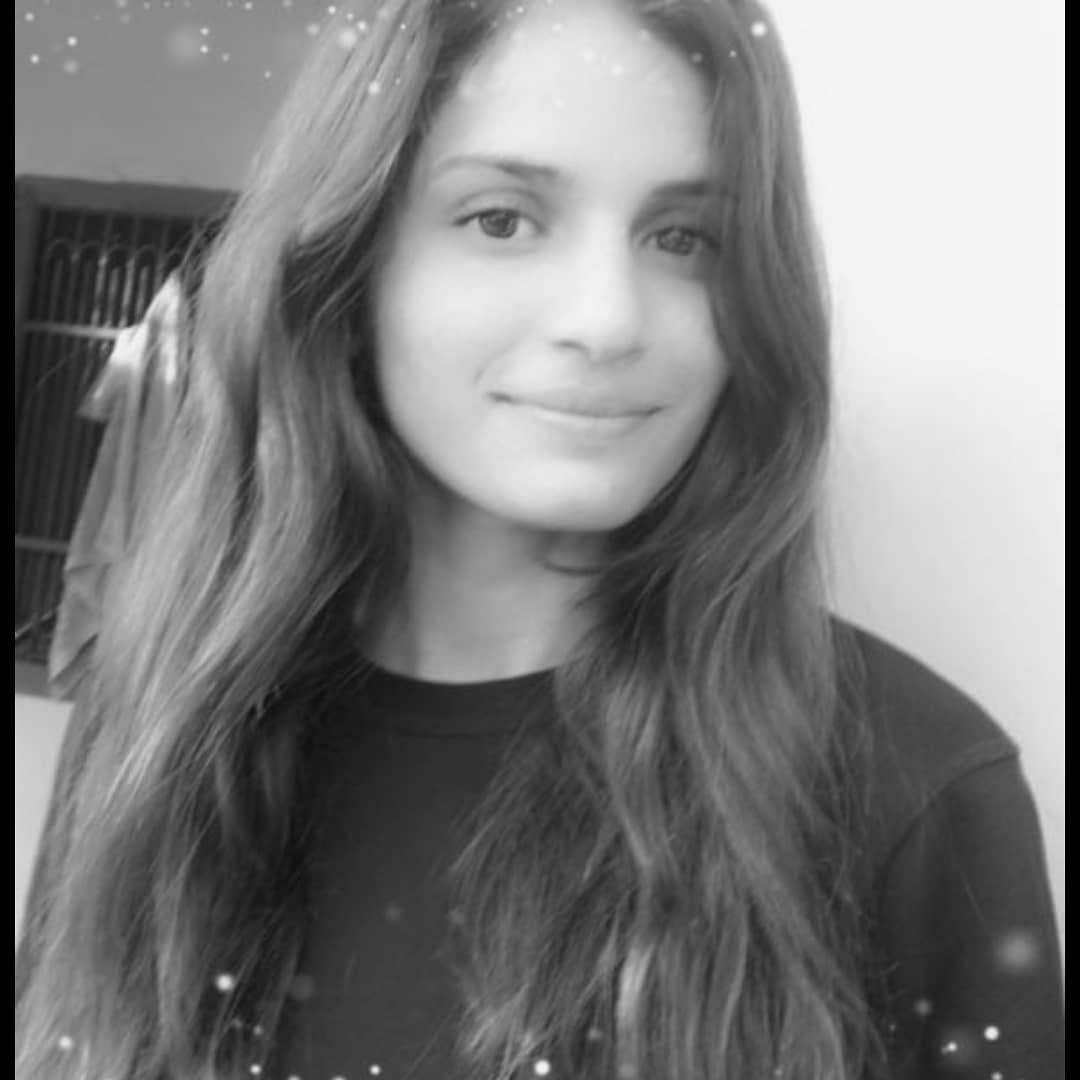

maanii.jpg


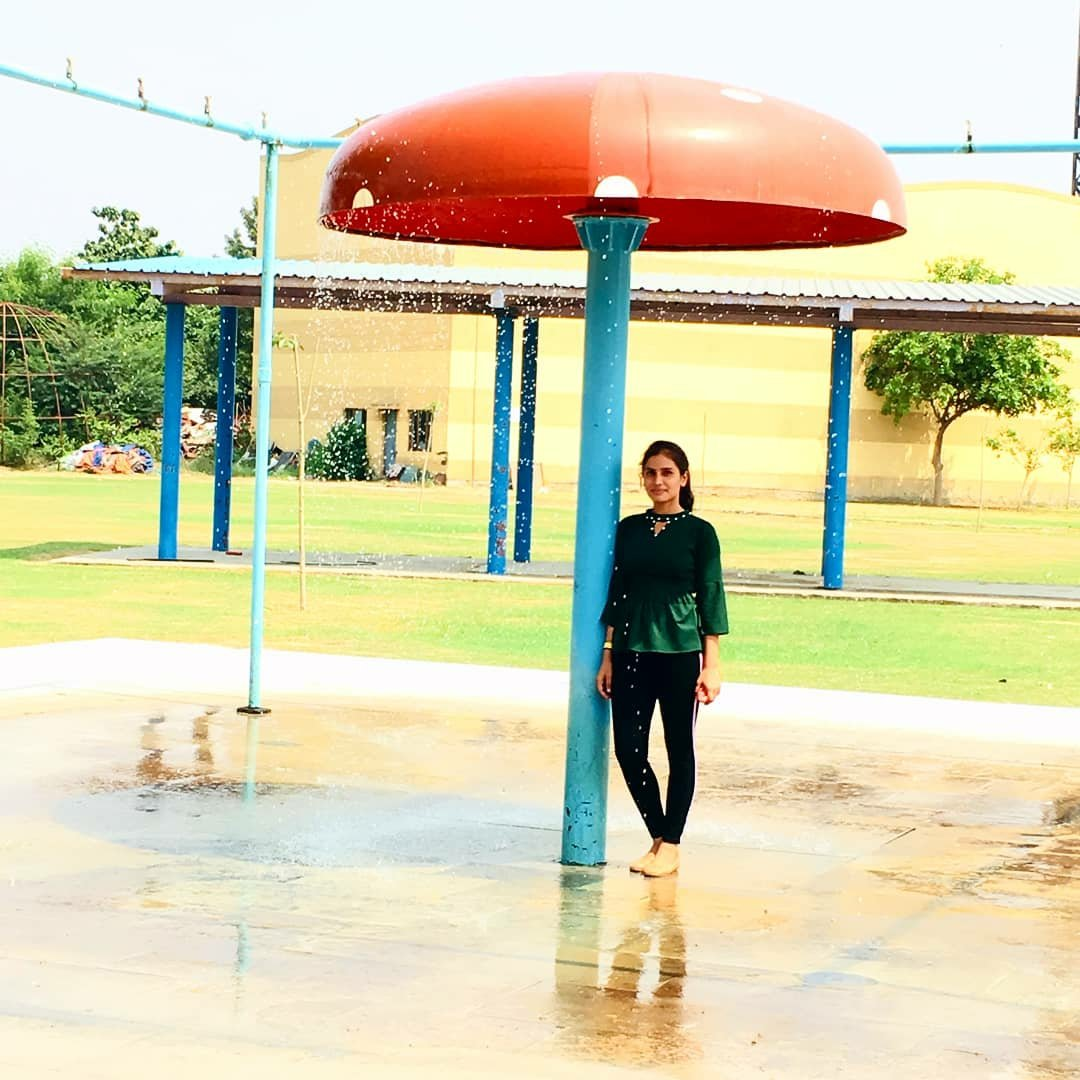

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

images={name:cv2.imread(name) for name in uploaded.keys()}

for name ,image in images.items():
  print(name)
  cv2_imshow(image)

In [8]:
import mediapipe as mp
mp_pose=mp.solutions.pose

In [9]:
# DrawingSpec for the face landmarks
mp_drawing=mp.solutions.drawing_utils 
drawing_spec=mp_drawing.DrawingSpec(thickness=1,circle_radius=1)

Nose coordinates: (620.4318308830261, 318.80839347839355)
Pose landmarks of manni.jpg:


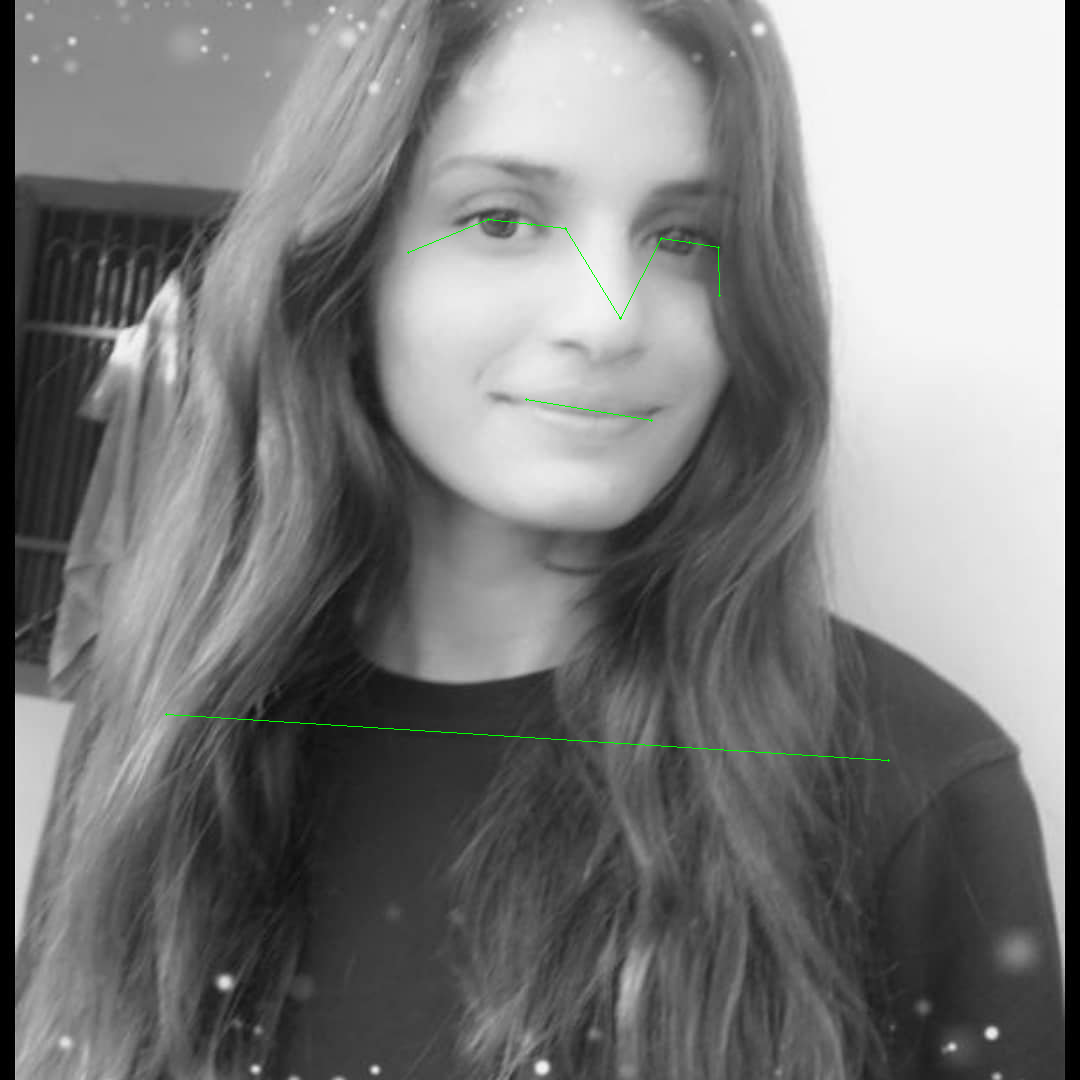

Nose coordinates: (656.7679524421692, 483.53543400764465)
Pose landmarks of maanii.jpg:


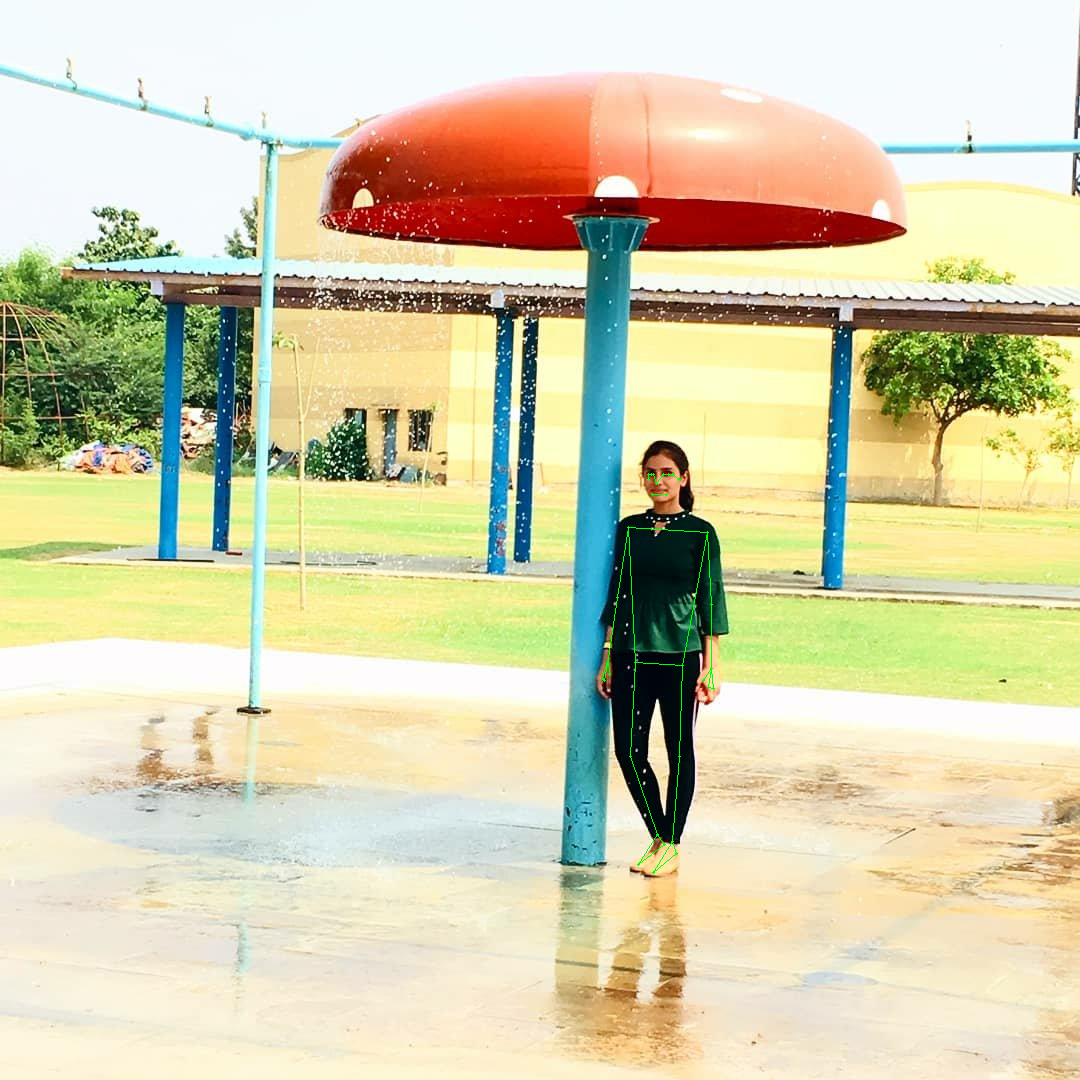

In [14]:
with mp_pose.Pose(static_image_mode=True,model_complexity=2,min_detection_confidence=0.5) as pose:
  for name,image in images.items():
    results=pose.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

    image_height,image_width,_=image.shape
    
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )

    print(f'Pose landmarks of {name}:')
    annotated_image=image.copy()
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
    cv2_imshow(annotated_image)